## LOOP WIRE

Magnetic fields are generated by electric currents, which can be either macroscopic currents flowing through wires or microscopic currents associated with electrons in atomic orbits. The magnetic field, denoted as B, is defined based on the force experienced by a moving charge according to the Lorentz force law. The interaction between magnetic fields and charges gives rise to numerous practical applications.

Now, let's consider a circular loop located in the xz-plane, with a radius of R and carrying a current of I. We want to determine the magnetic field at an arbitrary point P along the axis of the loop.

To find the magnetic field resulting from the current, we can apply the Biot-Savart law. Initially, we examine arbitrary segments on opposite sides of the loop to demonstrate, through vector analysis, that the net magnetic field direction is directed along the central axis from the loop. Using the Biot-Savart law, we can then derive the expression for the magnetic field.

Specifically, the magnetic field strength at the center of a circular loop is given by the following expression:
$B = \frac{\mu_oI}{2R}$ , Where R is the radius of the loop.

Of course that we can Nondimensionalisation the equation for easier equation to solve it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gaussxw import gaussxw 
from numba import njit
import time

For a problem of a loop wire we have:

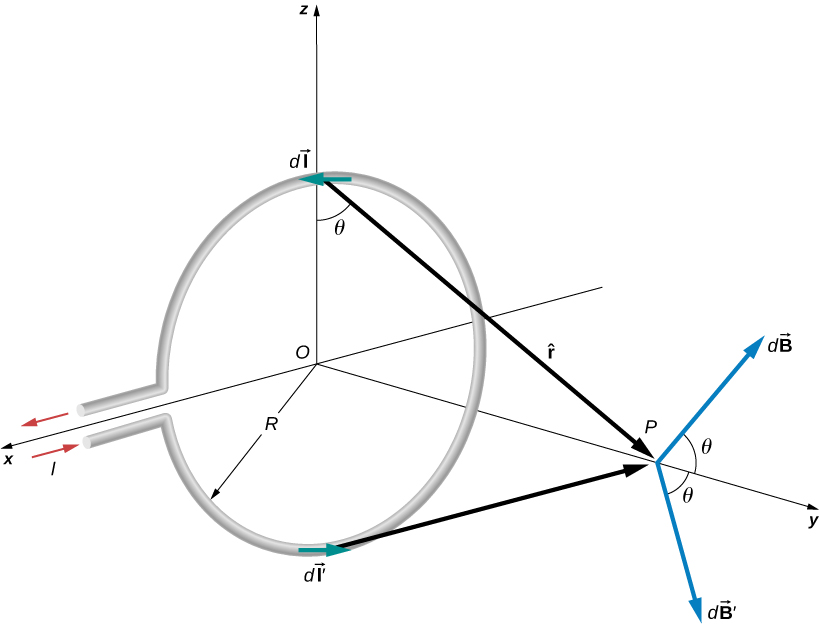

By employing the process of nondimensionalization with the magnetic field formula, we can describe its behavior in space. In this particular scenario, the Gaussian formula of integration is utilized to determine the values of the magnetic field.

In [2]:
def Bx(x, y, z, N): 
    u, w = np.polynomial.chebyshev.chebgauss(N)
    d1 = ((x - u)**2 + (y - np.sqrt(1 - u**2))**2 + z**2)**1.5
    d2 = ((x + u)**2 + (y + np.sqrt(1 - u**2))**2 + z**2)**1.5
    f = - z*u * ((1/d1 - 1/d2)) 
    return f * w
def By(x, y, z, N):
    u, w = np.polynomial.chebyshev.chebgauss(N)
    d1 = ((x - u)**2 + (y - np.sqrt(1 - u**2))**2 + z**2)**1.5
    d2 = ((x + u)**2 + (y + np.sqrt(1 - u**2))**2 + z**2)**1.5
    f = - z * np.sqrt(1-u**2) * ((1/d1 - 1/d2) * np.sqrt(1-u**2))
    return f * w
def Bz(x, y, z, N):
    u, w = np.polynomial.chebyshev.chebgauss(N)
    d1 = ((x - u)**2 + (y - np.sqrt(1 - u**2))**2 + z**2)**1.5
    d2 = ((x + u)**2 + (y + np.sqrt(1 - u**2))**2 + z**2)**1.5
    f =   - (((1 - x*u - y*np.sqrt(1-u**2))/d1) + ((1 + x*u + y*np.sqrt(1 - u**2))/d2)) 
    return f * w
print(np.sum(Bx(2, 2, 0, 100)))
print(np.sum(By(2, 2, 0, 100)))
print(np.sum(Bz(2, 2, 0, 100)))

0.0
0.0
0.16127809380538324


Here, it is evident that there is only a magnetic field component along the z-axis when we select the coordinates (x=2, y=2, z=0). This conclusion is straightforward based on the geometry of the problem. If the coordinates are altered, different values of the magnetic field will arise.

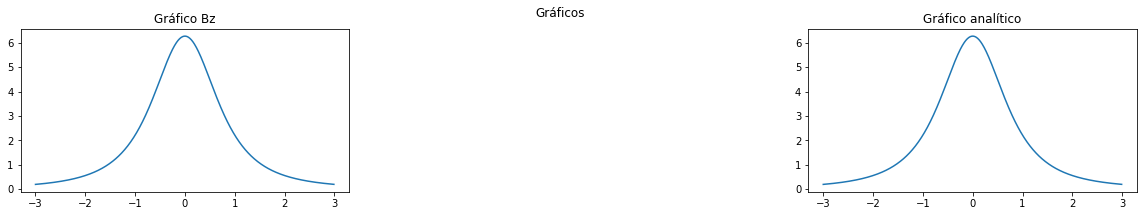

In [4]:
def exato(I, R, z):
    uo = 4*np.pi
    return (uo*I*R**2) / (2*((z**2 + R**2)**1.5))

x = np.arange(-3, 3, 0.01)
l = []
for i in x:
    l.append(-np.sum(Bz(0, 0, i, 100)))
figura= plt.figure(figsize=(20,3))
figura.suptitle('Gráficos')              

figura.add_subplot(131)                      
plt.plot(x, l)
plt.title('Gráfico Bz')

figura.add_subplot(133)
plt.plot(x, [exato(1, 1, xi)for xi in x])
plt.title('Gráfico analítico')
plt.show()

We can see that the values given by python is quite accurate, we cannot see the difference between both graphics.

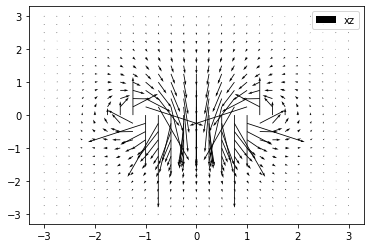

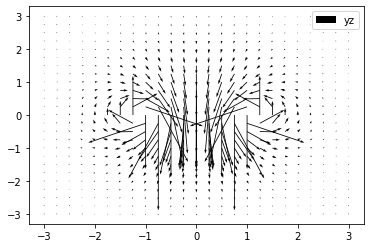

In [43]:
x, z = np.arange(-3, 3.25, 0.25), np.arange(-3, 3.25, 0.25)
x1, x2 = np.zeros([len(x), len(z)]), np.zeros([len(x), len(z)])
for i,n in enumerate(x):
    for j,k in enumerate(z):
        x1[i,j], x2[i,j] = np.sum(Bz(k, 0, n, 100)), np.sum(Bx(k, 0, n, 100))
plt.quiver(x, z, x2, x1, label = 'xz')
plt.legend()
plt.show()

for i,n in enumerate(x):
    for j,k in enumerate(z):
        x1[i,j], x2[i,j] = np.sum(By(0, k, n, 100)), np.sum(Bz(0, k, n, 100))
plt.quiver(x, z, x1, x2, label = 'yz')
plt.legend()
plt.show()

If we project the values onto a quiver plot (a function that visualizes vector points), we can clearly observe the geometric nature of the problem. This visualization helps us confirm the accuracy of our calculations.

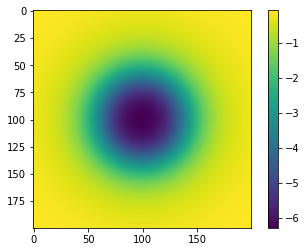

In [26]:
def r(a, b):
    return(np.sqrt(a**2 + b**2))

p = 200
x = y = np.linspace(-1.5, 1.5, p)
X, Y = np.meshgrid(x, y)
I = np.zeros([p,p])
for i, n in enumerate(x):
    for j, k in enumerate(y):
        if abs(r(n, k)-1) > 0.5:
            I[i,j] = np.sum(Bz(n, k, r(n,k), 20))
        if 0.1 < abs(r(n, k)-1) < 0.5:
            I[i,j] = np.sum(Bz(n, k, r(n,k), 40))
        if 0.01 < abs(r(n,k)-1) < 0.1:
            I[i,j] = np.sum(Bz(n, k, r(n,k), 80))
        if abs(r(n,k)-1) < 0.01:
            I[i,j] = np.sum(Bz(n, k, r(n,k), 200))
plt.imshow(I)
plt.colorbar()
plt.show()

By using the "imshow" function along with a colorbar, we can visualize the magnitude of the magnetic field. It becomes evident that the field strength decreases as we move farther away from the source. Furthermore, it is clear that the field is strongest in the middle region. This observation aligns with our understanding of the problem, where the magnetic field intensity is maximized at certain points.

## Solenoid

A long straight coil of wire, known as a solenoid, can be employed to generate a magnetic field that closely resembles that of a bar magnet. Solenoids find extensive use in various practical applications. The magnetic field produced by a solenoid can be significantly enhanced by incorporating an iron core, a common practice in electromagnets. The expression for the magnetic field of a solenoid with an iron core is:

$B = \mu nl$ , Where $n = \frac{N}{L}$is the number of turns per unit length, sometimes called the "turns density".

The magnetic field, denoted as B, is directly proportional to the current, I, flowing through the coil. The expression represents an idealization for an infinitely long solenoid, yet it serves as a reliable approximation for the magnetic field of a long solenoid. To simplify the equation and facilitate solving, we can employ nondimensionalization techniques.

In the case of a infinite solenoide:

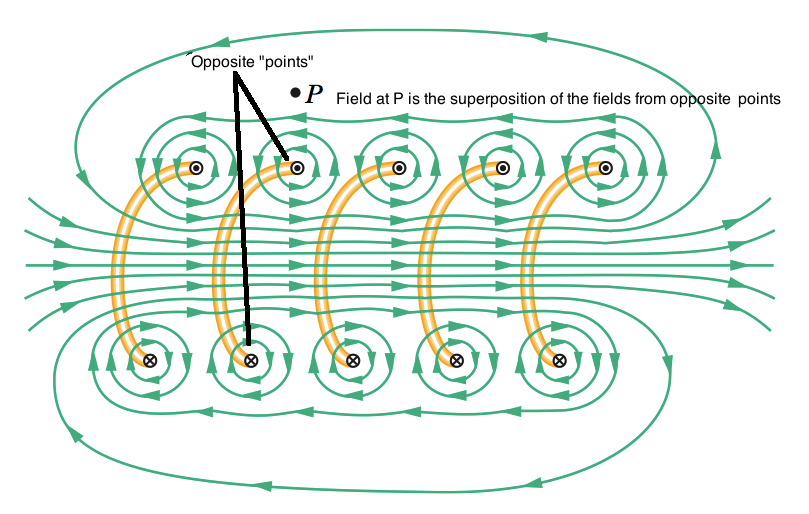

For the problem, we'll use gauss chebyshev integration method.

In [5]:
u, w = np.polynomial.chebyshev.chebgauss(100)
@njit
def Bt(x, y, z1, z2):
    def Bx(x, y, z1, z2): 
        d1 = ((x - u)**2 + (y - np.sqrt(1 - u**2))**2 + (z1 - z2)**2)**1.5
        d2 = ((x + u)**2 + (y + np.sqrt(1 - u**2))**2 + (z1 - z2)**2)**1.5
        f = -(z1 - z2)*u * ((1/d1 - 1/d2)) 
        return np.sum(f * w)

    def By(x, y, z1, z2):
        d1 = ((x - u)**2 + (y - np.sqrt(1 - u**2))**2 + (z1 - z2)**2)**1.5
        d2 = ((x + u)**2 + (y + np.sqrt(1 - u**2))**2 + (z1 - z2)**2)**1.5
        f = -(z1 - z2) * np.sqrt(1-u**2) * ((1/d1 - 1/d2))
        return np.sum(f * w)

    def Bz(x, y, z1, z2):
        d1 = ((x - u)**2 + (y - np.sqrt(1 - u**2))**2 + (z1 - z2)**2)**1.5
        d2 = ((x + u)**2 + (y + np.sqrt(1 - u**2))**2 + (z1 - z2)**2)**1.5
        f = -(((1 - x*u - y*np.sqrt(1-u**2))/d1) + ((1 + x*u + y*np.sqrt(1 - u**2))/d2)) 
        return np.sum(f * w)
    return np.array([Bx(x, y, z1, z2), By(x, y, z1, z2), Bz(x, y, z1, z2)])
def simpson(x, y, z1, L, n):
    def Integrationx(x, y, z1, n):
        r = np.linspace(-L, L, n + 1)
        hr = r[0] - r[1]
        f1 = np.zeros(r.shape)
        for i,n in enumerate(r):
            f1[i]=Bt(x,y,z1,n)[0]
        return hr/3 *( f1[0] + f1[-1] + 4*np.sum(f1[1:-1:2]) + 2*np.sum(f1[2:-2:2]))
    def Integrationy(x, y, z1, n):
        r = np.linspace(-L, L, n + 1)
        hr = r[0] - r[1]
        f1 = np.zeros(r.shape)
        for i,n in enumerate(r):
            f1[i]=Bt(x,y,z1,n)[1]
        return hr/3 *( f1[0] + f1[-1] + 4*np.sum(f1[1:-1:2]) + 2*np.sum(f1[2:-2:2]))
    def Integrationz(x, y, z1, n):
        r = np.linspace(-L, L, n + 1)
        hr = r[0] - r[1]
        f1 = np.zeros(r.shape)
        for i,n in enumerate(r):
            f1[i]=Bt(x,y,z1,n)[2]
        return hr/3 *( f1[0] + f1[-1] + 4*np.sum(f1[1:-1:2]) + 2*np.sum(f1[2:-2:2]))
    return np.array([Integrationx(x, y, z1, n), Integrationy(x, y, z1, n), Integrationz(x, y, z1, n)])
print(simpson(0, 0, 4, 1, 100))

[-0.         -0.          0.20041713]


Here the idea is the same, we have the coordenates(x,y,z) so we'll have three values for the magnetic field.

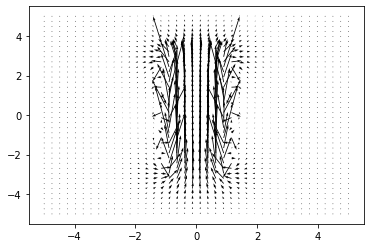

In [10]:
def Campo(L):
    x, z = np.linspace(-5, 5, 40), np.linspace(-5, 5, 40)
    x1, x2 = np.zeros([len(x), len(z)]), np.zeros([len(x), len(z)])
    for i,n in enumerate(x):
        for j,k in enumerate(z):
                x1[i,j], x2[i,j] = np.sum(simpson(k, 0, n, L, 10)[2]), np.sum(simpson(k, 0, n, L, 10)[0])
    plt.quiver(x, z, x2, x1)
    plt.show()
Campo(3)

Once again, by visualizing the magnetic field using a quiver plot, we can clearly observe how the field extends in space. The length of the field can be adjusted by modifying the function Campo(L). Increasing the value of L allows us to zoom in on the loop wire, enabling us to see the opposing points and observe how the external field approaches zero, which aligns with the prediction of the formula when L approaches infinity. It is evident that if we select Campo(1), we will observe the same behavior for a single loop, as we indeed have only one loop in that case.